<a href="https://colab.research.google.com/github/magumc/magumc.github.io/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de confusion

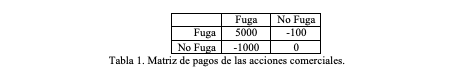



Descargamos las librerias que utilizaremos

In [ ]:
!pip -q install numpy gensim scikit-learn 

Importamos las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn

from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

#librerias para modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import statsmodels.api as srm

#para graficar el arbol de decision
from sklearn.tree import export_graphviz
  #from sklearn.externals.six import StringIO da error porque en la nueva version se eliminó esta librería
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data

#librerias para la validacion y obtener metricas
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,roc_curve, auc,r2_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

#guardar modelos entrenados
from joblib import dump, load
import os
import seaborn as sns

Para subir un archivo de google drive:

**Cuando corra la siguiente linea, le pedira un código, por favor siga las intrucciones a continuación, inserte el código entregado y presione enter**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Cargamos el o los archivo a utilizar

In [ ]:
ruta_data_set = '/content/gdrive/MyDrive/Colab Notebooks/Fundamentos Analytics/Tarea 1/Base_Fuga_2021_preprocess.xlsx'
data_set = pd.read_excel(ruta_data_set)

**Hacemos una rapida limpieza de los datos, deberian venir listos del preprocesamiento.**

Vemos que tiene nuestra base de datos

In [ ]:
data_set

,Unnamed: 0,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,FUGA_NF,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
0,0,0.230769,0.222222,0.002445,0.591422,0.098192,0.862198,1,0,1,0,1
1,1,0.353846,0.000000,0.004890,0.597611,0.095832,0.847618,1,0,0,0,0
2,2,0.153846,0.111111,0.000000,0.580333,0.120531,0.857949,1,0,0,0,1
3,3,0.476923,0.111111,0.000000,0.607018,0.063720,0.869364,1,0,1,0,0
4,4,0.615385,0.111111,0.044010,0.601114,0.081556,0.850400,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5600,5600,0.169231,0.000000,0.000000,0.594586,0.060761,0.857404,0,0,0,0,1
5601,5601,0.276923,0.111111,0.039120,0.571985,0.061200,0.858667,0,0,1,0,1
5602,5602,0.230769,0.000000,0.009780,0.595136,0.061090,0.849164,0,0,1,0,0
5603,5603,0.661538,0.000000,0.000000,0.654833,0.061200,0.940421,0,0,0,1,0


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5605 non-null   int64  
 1   Edad                  5605 non-null   float64
 2   AvrTarj               5605 non-null   float64
 3   AvrTrans              5605 non-null   float64
 4   LnMargen              5605 non-null   float64
 5   LnCredit              5605 non-null   float64
 6   LnIngreso             5605 non-null   float64
 7   FUGA_NF               5605 non-null   int64  
 8   NivelEduc_Incompleta  5605 non-null   int64  
 9   Genero_M              5605 non-null   int64  
 10  EstCivil_OTRO         5605 non-null   int64  
 11  EstCivil_SOL          5605 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 525.6 KB


In [ ]:
tabla = data_set.drop('Unnamed: 0', axis=1)
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  5605 non-null   float64
 1   AvrTarj               5605 non-null   float64
 2   AvrTrans              5605 non-null   float64
 3   LnMargen              5605 non-null   float64
 4   LnCredit              5605 non-null   float64
 5   LnIngreso             5605 non-null   float64
 6   FUGA_NF               5605 non-null   int64  
 7   NivelEduc_Incompleta  5605 non-null   int64  
 8   Genero_M              5605 non-null   int64  
 9   EstCivil_OTRO         5605 non-null   int64  
 10  EstCivil_SOL          5605 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 481.8 KB


In [ ]:
tabla.describe(include='all')

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,FUGA_NF,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
count,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000
mean,0.321265,0.092517,0.034151,0.600590,0.079881,0.866868,0.872257,0.032471,0.700089,0.051918,0.419625
std,0.139208,0.077947,0.067639,0.021106,0.045459,0.029778,0.333833,0.177263,0.458260,0.221881,0.493542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215385,0.037037,0.000000,0.594586,0.061749,0.852011,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.276923,0.111111,0.012225,0.597817,0.066880,0.862646,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.400000,0.111111,0.036675,0.605165,0.077846,0.878401,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Top: Moda

Count: Cuantas variables categoricas tiene

unique: si es variable categorica o no y cuantas categorias son

freq: la frecuencia de la moda

In [ ]:
data_set = tabla

#Separación de datos

Definimos la variable dependiente como Y y las variables independientes como X

In [ ]:
data_set

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,FUGA_NF,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
0,0.230769,0.222222,0.002445,0.591422,0.098192,0.862198,1,0,1,0,1
1,0.353846,0.000000,0.004890,0.597611,0.095832,0.847618,1,0,0,0,0
2,0.153846,0.111111,0.000000,0.580333,0.120531,0.857949,1,0,0,0,1
3,0.476923,0.111111,0.000000,0.607018,0.063720,0.869364,1,0,1,0,0
4,0.615385,0.111111,0.044010,0.601114,0.081556,0.850400,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5600,0.169231,0.000000,0.000000,0.594586,0.060761,0.857404,0,0,0,0,1
5601,0.276923,0.111111,0.039120,0.571985,0.061200,0.858667,0,0,1,0,1
5602,0.230769,0.000000,0.009780,0.595136,0.061090,0.849164,0,0,1,0,0
5603,0.661538,0.000000,0.000000,0.654833,0.061200,0.940421,0,0,0,1,0


In [ ]:
y = data_set['FUGA_NF'] #toma el valor de 1 cuando la variable es >50K y 0 cuando la variable es <=50k
del data_set['FUGA_NF']
X = data_set

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5600    0
5601    0
5602    0
5603    0
5604    0
Name: FUGA_NF, Length: 5605, dtype: int64

In [ ]:
X

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
0,0.230769,0.222222,0.002445,0.591422,0.098192,0.862198,0,1,0,1
1,0.353846,0.000000,0.004890,0.597611,0.095832,0.847618,0,0,0,0
2,0.153846,0.111111,0.000000,0.580333,0.120531,0.857949,0,0,0,1
3,0.476923,0.111111,0.000000,0.607018,0.063720,0.869364,0,1,0,0
4,0.615385,0.111111,0.044010,0.601114,0.081556,0.850400,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5600,0.169231,0.000000,0.000000,0.594586,0.060761,0.857404,0,0,0,1
5601,0.276923,0.111111,0.039120,0.571985,0.061200,0.858667,0,1,0,1
5602,0.230769,0.000000,0.009780,0.595136,0.061090,0.849164,0,1,0,0
5603,0.661538,0.000000,0.000000,0.654833,0.061200,0.940421,0,0,1,0


Separamos el total de datos en datos de entrenamiento y de prueba, generando una matriz de entrenamiento (70%) y testeo (30%). Busco el Y real con el Y esperado.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
5339,0.200000,0.074074,0.036675,0.599397,0.062626,0.871192,0,1,1,0
2196,0.353846,0.000000,0.009780,0.594380,0.140921,0.867995,0,1,0,0
2901,0.353846,0.111111,0.019560,0.598641,0.130537,0.889636,0,1,0,1
4412,0.461538,0.222222,0.088020,0.598710,0.081133,0.901823,0,1,1,0
2140,0.215385,0.000000,0.039120,0.596648,0.075500,0.846975,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4931,0.430769,0.000000,0.000000,0.594517,0.061090,0.910189,0,0,0,0
3264,0.400000,0.111111,0.163814,0.611133,0.084085,0.896903,0,1,0,0
1653,0.476923,0.111111,0.000000,0.605508,0.061310,0.892707,0,0,1,0
2607,0.076923,0.111111,0.207824,0.594242,0.063501,0.847118,0,1,0,0


#Entrenamiento y Validación 

En esta seccion se entrenan los modelos con los datos de entrenamiento y se realiza cross-validation con el objetivo de encontrar los mejores parametros para cada modelo y de esta forma encontrar el que mas se ajuste a nuestros datos para que hagan una mejor predicción.

## Regresión logistica

Definimos el modelo de regresión logistica con nuestros X e Y de entrenamiento

In [ ]:
logit_model=srm.Logit(y_train, srm.add_constant(X_train))

Ajustamos nuestro modelo a los datos de entrenamiento:

In [ ]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.277568
         Iterations 9


Obtenemos los resultados del modelo:

In [ ]:
print(result.summary2())

                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.278      
Dependent Variable:   FUGA_NF           AIC:               2199.7998  
Date:                 2023-05-04 21:06  BIC:               2268.8206  
No. Observations:     3923              Log-Likelihood:    -1088.9    
Df Model:             10                LL-Null:           -1508.2    
Df Residuals:         3912              LLR p-value:       1.0415e-173
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                  1.4335   2.8850  0.4969 0.6193  -4.2210  7.0879
Edad                   0.4513   0.4701  0.9602 0.3370  -0.4700  1.3726
AvrTarj               18.5030   1.

Eliminamos la variable 'EstCivil_OTRO' porque es la que tiene el mayor P-value mayor a 0,05 y por lo tanto no es significativa en el modelo. Hay que verificar P value, y la interpretacion del Beta debe tener sentido. Si el P es significativo pero el Beta no tiene sentido, hay un error en la calibracion.

Para esto definimos una nueva variable X_train y X_test sin esta variable como se muestra a continuación:

In [ ]:
X_train_reg = X_train[['Edad','AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','NivelEduc_Incompleta','Genero_M','EstCivil_SOL']]
X_test_reg = X_test[['Edad','AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','NivelEduc_Incompleta','Genero_M','EstCivil_SOL']]

Entrenamos nuevamente el modelo con nuestros nuevos X_train_reg y X_test_reg y obtenemos sus resultados

In [ ]:
logit_model=srm.Logit(y_train, srm.add_constant(X_train_reg))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277570
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.278      
Dependent Variable:   FUGA_NF           AIC:               2197.8179  
Date:                 2023-05-04 21:06  BIC:               2260.5641  
No. Observations:     3923              Log-Likelihood:    -1088.9    
Df Model:             9                 LL-Null:           -1508.2    
Df Residuals:         3913              LLR p-value:       1.0577e-174
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                  1.4251   2.8841  0.4941 0.6212  -4.2277  7.0779
Eda

Eliminamos la variable 'EstCivil_SOL' porque es la que tiene el mayor P-value mayor a 0,05 y por lo tanto no es significativa en el modelo.

In [ ]:
X_train_reg = X_train[['Edad','AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','NivelEduc_Incompleta','Genero_M']]
X_test_reg = X_test[['Edad','AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','NivelEduc_Incompleta','Genero_M']]

logit_model=srm.Logit(y_train, srm.add_constant(X_train_reg))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277684
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.278      
Dependent Variable:   FUGA_NF           AIC:               2196.7124  
Date:                 2023-05-04 21:06  BIC:               2253.1839  
No. Observations:     3923              Log-Likelihood:    -1089.4    
Df Model:             8                 LL-Null:           -1508.2    
Df Residuals:         3914              LLR p-value:       1.5592e-175
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                  1.8231   2.8513  0.6394 0.5226  -3.7653  7.4115
Eda

Concluimos entonces que la variable estado civil no es significativa en el modelo.

Eliminamos la variable 'Edad' porque es la que tiene el mayor P-value mayor a 0,05 y por lo tanto no es significativa en el modelo.

In [ ]:
X_train_reg = X_train[['AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','NivelEduc_Incompleta','Genero_M']]
X_test_reg = X_test[['AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','Genero_M']]

logit_model=srm.Logit(y_train, srm.add_constant(X_train_reg))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.277745
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.278      
Dependent Variable:   FUGA_NF           AIC:               2195.1852  
Date:                 2023-05-04 21:06  BIC:               2245.3820  
No. Observations:     3923              Log-Likelihood:    -1089.6    
Df Model:             7                 LL-Null:           -1508.2    
Df Residuals:         3915              LLR p-value:       1.7378e-176
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                  1.2092   2.7142  0.4455 0.6559  -4.1105  6.5290
Avr

Eliminamos la variable 'NivelEduc_Incompleta' porque es la que tiene el P-value mayor a 0,05 y por lo tanto no es significativa en el modelo.

In [ ]:
X_train_reg = X_train[['AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','Genero_M']]
X_test_reg = X_test[['AvrTarj','AvrTrans','LnMargen','LnCredit','LnIngreso','Genero_M']]

logit_model=srm.Logit(y_train, srm.add_constant(X_train_reg))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.278066
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.277      
Dependent Variable: FUGA_NF          AIC:              2195.7068  
Date:               2023-05-04 21:06 BIC:              2239.6291  
No. Observations:   3923             Log-Likelihood:   -1090.9    
Df Model:           6                LL-Null:          -1508.2    
Df Residuals:       3916             LLR p-value:      4.9440e-177
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
-------------------------------------------------------------------
              Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
-------------------------------------------------------------------
const          1.6178    2.6734   0.6051  0.5451   -3.6220   6.8576
AvrTarj       18.4719    1.0435  17.7015  0.0000 


Ahora podemos ver que todas las demas variables son significativas en el modelo porque tienen un pvalue menor que 0,05.

Entonces definiremos el modelo de regresion logistica de la libreria "Sklearn" con las variables seleccionadas, para luego evaluar sus resultados de predicción (con la libreria "statsmodels" no es posible obtener todos los parametros que deseamos y con ambas se obtiene resultados similares en este caso). SkLearn es mas robusto, que el StatModels

In [ ]:
regresion = LogisticRegression(random_state=0)
regresion.fit(X_train_reg, y_train)

LogisticRegression(random_state=0)

A pesar de qe vemos que una gran difrencia en el valor de los coeficientes, no se interpreta como la regresion lineal, porque esta es logistica, luego lo que se deberia considerar es el signo.

Ojo con ln ingreso que es negativo, lo que implica que a mayor ingreso mas probabilidad de fuga, lo que no tiene mucho sentido. Habria que revisar si se realizo una mala calibracion en el preprocesamiento o la muestra no era muy representativa o existe un error en la base de datos.

In [ ]:
X_train

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
5339,0.200000,0.074074,0.036675,0.599397,0.062626,0.871192,0,1,1,0
2196,0.353846,0.000000,0.009780,0.594380,0.140921,0.867995,0,1,0,0
2901,0.353846,0.111111,0.019560,0.598641,0.130537,0.889636,0,1,0,1
4412,0.461538,0.222222,0.088020,0.598710,0.081133,0.901823,0,1,1,0
2140,0.215385,0.000000,0.039120,0.596648,0.075500,0.846975,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4931,0.430769,0.000000,0.000000,0.594517,0.061090,0.910189,0,0,0,0
3264,0.400000,0.111111,0.163814,0.611133,0.084085,0.896903,0,1,0,0
1653,0.476923,0.111111,0.000000,0.605508,0.061310,0.892707,0,0,1,0
2607,0.076923,0.111111,0.207824,0.594242,0.063501,0.847118,0,1,0,0


In [ ]:
X_train_reg

,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,Genero_M
5339,0.074074,0.036675,0.599397,0.062626,0.871192,1
2196,0.000000,0.009780,0.594380,0.140921,0.867995,1
2901,0.111111,0.019560,0.598641,0.130537,0.889636,1
4412,0.222222,0.088020,0.598710,0.081133,0.901823,1
2140,0.000000,0.039120,0.596648,0.075500,0.846975,1
...,...,...,...,...,...,...
4931,0.000000,0.000000,0.594517,0.061090,0.910189,0
3264,0.111111,0.163814,0.611133,0.084085,0.896903,1
1653,0.111111,0.000000,0.605508,0.061310,0.892707,0
2607,0.111111,0.207824,0.594242,0.063501,0.847118,1


In [ ]:
pd.DataFrame(zip(X_train_reg.columns, np.transpose(regresion.coef_.tolist()[0])),columns=['features','coef'])

,features,coef
0,AvrTarj,10.757189
1,AvrTrans,4.590720
2,LnMargen,1.516343
3,LnCredit,4.453035
4,LnIngreso,-1.445527
5,Genero_M,0.059064


## Arbol de decisión

Aqui discretizamos y tomamos diferentes umbrales para cada variable. Funciona mejor con variables nominales. Es un metodo que muchas veces es mejor, pero puede ser mas costoso y engorroso. Estan los arboles de clasificacion y regresion, este ultimo te predice un valor real. Cada nodo es una variable de entrada

Definimos el metodo de clasificación

In [ ]:
arbol = DecisionTreeClassifier(criterion = 'entropy') 

Si queremos el arbol sin ningun parametro de poda, entrenamos directamente este modelo con los x e y de entrenamiento y graficamos el arbol obtenido. 

Entropia mide la pureza del nodo. 

In [ ]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

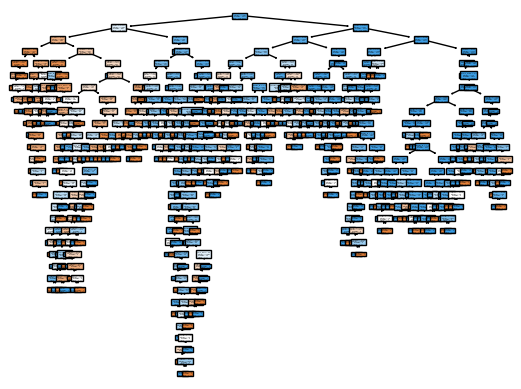

In [ ]:
tree.plot_tree(arbol, feature_names = data_set.columns, filled = True)
plt.show()

Ahora le asignamos una profundidad maxima a nuestro modelo de clasificacion para obtener un arbol mas pequeño y facil de interpretar

In [ ]:
arbol = DecisionTreeClassifier(criterion = 'entropy',max_depth= 3, max_leaf_nodes= 10, min_samples_split= 2)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10)

Graficamos nuestro nuevo arbol

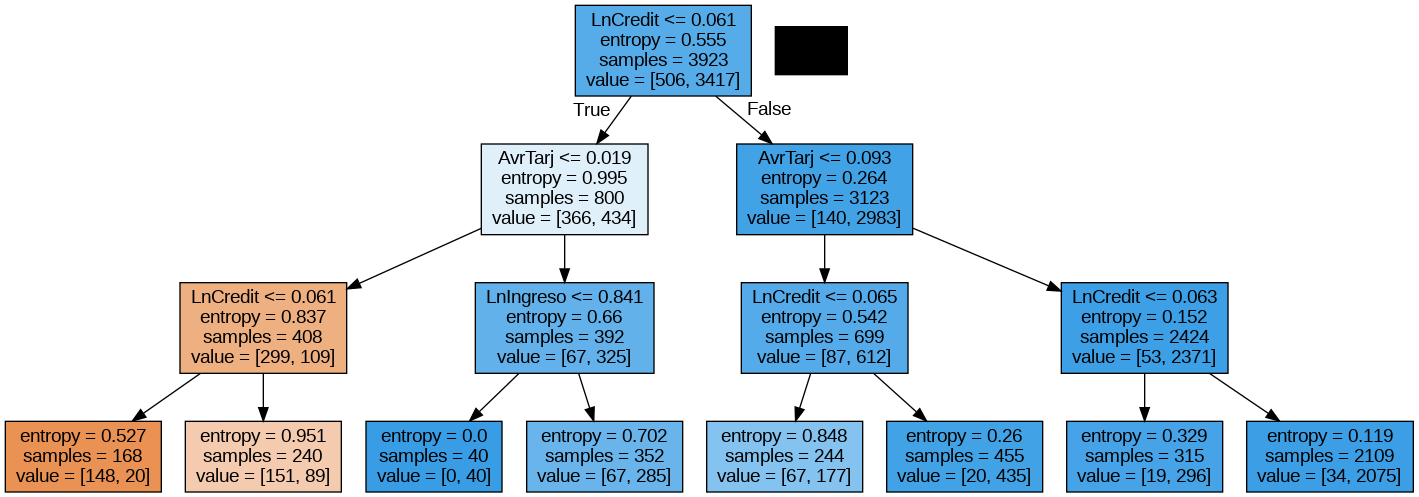

In [ ]:
#con estas funciones se grafica mas grande y es mas facil de leer
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=data_set.columns,filled= True )
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Donde se ve la ganancia. Me sirve para saber el nodo raiz y desde ahi ramificar.

Para saber por donde se ramifica, se ve la entropia. Esta es 0 cuando hay orden absoluto y 1 cuando hay desorden absoluto. A medida que se ramifica, la entropia cambia, deberia ir disminiyendo. Esa diferencia de entropia es la ganancia de informacion. Cuanta entropia gano, osea, cuanto orden gano, menor desorden posible. Orden = pureza del nodo.

Este método calcula todas las ramificaciones posibles, y quedarse con la que presenta la mejor ramificación, segun el criterio anterior.

ln credit es la mejor variable para este modelo porque es la que divide el resto del modelo, y es la que me genera la mayor ganancia de entropia, menor desorden posible. Género no es relevante ya que no aparece en el arbol.



Tambien podemos analizar que parametros son mejores para nuestro arbol en base a los datos que utilizamos, para esto analizamos los siguientes parametros con una grilla:


*   max_leaf_nodes: Número maximo de division del nodo.
*   min_samples_split: Número mínimo de muestras para dividir un nodo.
*   max_depth: Profundidad maxima del arbol.

Se pueden encontrar más parametros para este modelo en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) del clasificador de arboles de decisión.



In [ ]:
parametros= {'max_leaf_nodes': [5,18,30], 'min_samples_split': [2, 3, 4], 'max_depth':[2,3,4]}

Realizamos la grilla con la funcion "GridSearchCV" de la libreria Sklearn y entrenamos los modelos con nuestros x e y de entrenamiento

In [ ]:
tree_cv=GridSearchCV(arbol,parametros,cv=10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              max_leaf_nodes=10),
             param_grid={'max_depth': [2, 3, 4], 'max_leaf_nodes': [5, 18, 30],
                         'min_samples_split': [2, 3, 4]})

Vemos cuales son los mejores parametros segun la grilla

In [ ]:
print('Best params:')
print(tree_cv.best_params_)

Best params:
{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 2}


Nos dio prufundidad 4, despues de eso ya no hay mucha mejora.
Guardamos el mejor modelo de la grilla para luego obtener sus resultados de predicción

In [ ]:
arbol = tree_cv.best_estimator_
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=5)

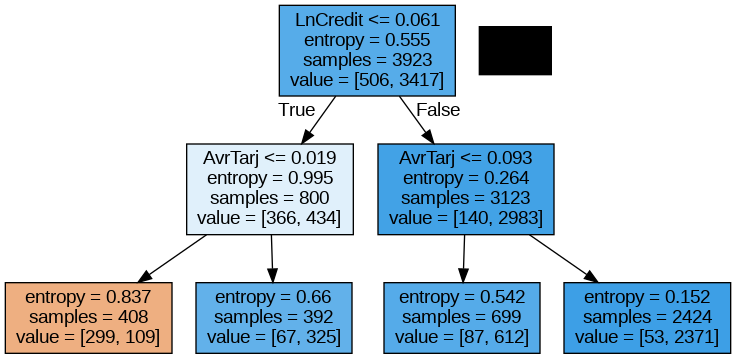

In [ ]:
#graficando nuevo arbol
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=data_set.columns,filled= True )
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

OVERFITTINg

Si tengo un modelo que no me explica bien el problema pero si me describe muy bien el conjunto de entrenamiento, caigo en el sobreajuste, pues no funcionaria bien en otra data. Esto pasa en un arbol que tiene muchas ramificaciones, pues tendria una rama para cada posible respuesta. Luego, el modelo quizas va a estar tan bien entrenado que faltaria flexibilidad cuando me deba entregar un valor nuevo. Mayor probabilidad de que me entregue un valor aleatorio.

En el conjunto de entrenamiento, Mientras mas crece el numero de nodos en el árbol, mejor me va en el entrenamiento.

Pero en la realidad al principio me sube el desempeño, pero después ya me empieza a bajar el desempeño, luego este desempeño en el testeo no tiene relación con el de entrenamiento.

POr eso, existe paramatros que me indican hasta donde ramificar para evitar sobreajuste. 

Con el cross validation podemos hacer un testeo con hartos arboles y con cual funciona mejor en el mayor % de los casos.


## Normalizacion

**Los modelos a continuación es mejor hacerlos con normalización por lo que normalizaremos la base de datos**

In [ ]:
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)

Dividimos nuevamente los datos:

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_set_scaled, y, test_size=0.3, random_state = 0)

In [ ]:
X_train_scaled

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
5339,0.200000,0.074074,0.036675,0.599397,0.062626,0.871192,0.0,1.0,1.0,0.0
2196,0.353846,0.000000,0.009780,0.594380,0.140921,0.867995,0.0,1.0,0.0,0.0
2901,0.353846,0.111111,0.019560,0.598641,0.130537,0.889636,0.0,1.0,0.0,1.0
4412,0.461538,0.222222,0.088020,0.598710,0.081133,0.901823,0.0,1.0,1.0,0.0
2140,0.215385,0.000000,0.039120,0.596648,0.075500,0.846975,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4931,0.430769,0.000000,0.000000,0.594517,0.061090,0.910189,0.0,0.0,0.0,0.0
3264,0.400000,0.111111,0.163814,0.611133,0.084085,0.896903,0.0,1.0,0.0,0.0
1653,0.476923,0.111111,0.000000,0.605508,0.061310,0.892707,0.0,0.0,1.0,0.0
2607,0.076923,0.111111,0.207824,0.594242,0.063501,0.847118,0.0,1.0,0.0,0.0


##K-vecinos mas cercanos

Definimos el metodo de clasificación a utilizar:


In [ ]:
Knn = KNeighborsClassifier()



Definimos los parametros para hacer una grilla con cross validation y encontrar los parametros del modelo de k-vecinos mas cercanos que mas se ajuste a nuestros datos y entregue mejores resultados. Los parametros a analizar son los siguientes:


*   n_neighbors: Número de vecinos.
*   weights: Función de pesos utilizada en la predicción. Puede ser la función uniforme (Todos los puntos de cada vecino se ponderan por igual) y la función de distancia (punto de pesos por la inversa de su distancia, los vecinos mas cercanos tendran mas influencia que los que estan mas lejos).
*   metric: Metrica de distancia que se utiliza para el arbol. 

Se pueden encontrar más parametros para este modelo en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) del clasificador de k-vecinos mas cercanos.

Tomando en cuenta que considera todos los atributos, puede que dominen los atributos irrelevantes, por eso conviene filtrarlos y ponderar distancias.




In [ ]:
parametros= {'n_neighbors': [3,5,11,19], 'weights': ['uniform','distance'], 'metric':['euclidean','manhattan']}

Realizamos la grilla con la funcion "GridSearchCV" de la libreria Sklearn y entrenamos los modelos con nuestros x e y de entrenamiento En numero de vecinos debe ser impar para evitar empates.

In [ ]:
knn_cv=GridSearchCV(Knn,parametros,cv=10)
knn_cv.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']})

Vemos cuales son los mejores parametros segun la grilla

In [ ]:
print('Best params for k-neighborns:')
print(knn_cv.best_params_)

Best params for k-neighborns:
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


Guardamos el mejor modelo de la grilla para luego obtener sus resultados de predicción. El Mejor fue k=19 manhattan distancia.

In [ ]:
Knn = knn_cv.best_estimator_

Grafiquemos los puntajes obtenidos en la grilla con los distintos parametros probados.

Primero transformamos los resultados de la grilla en un dataframe para poder analizarlo

In [ ]:
grid_results = pd.DataFrame(knn_cv.cv_results_)

Luego con estos datos graficamos los puntajes obtenidos en base a los parametros analizados

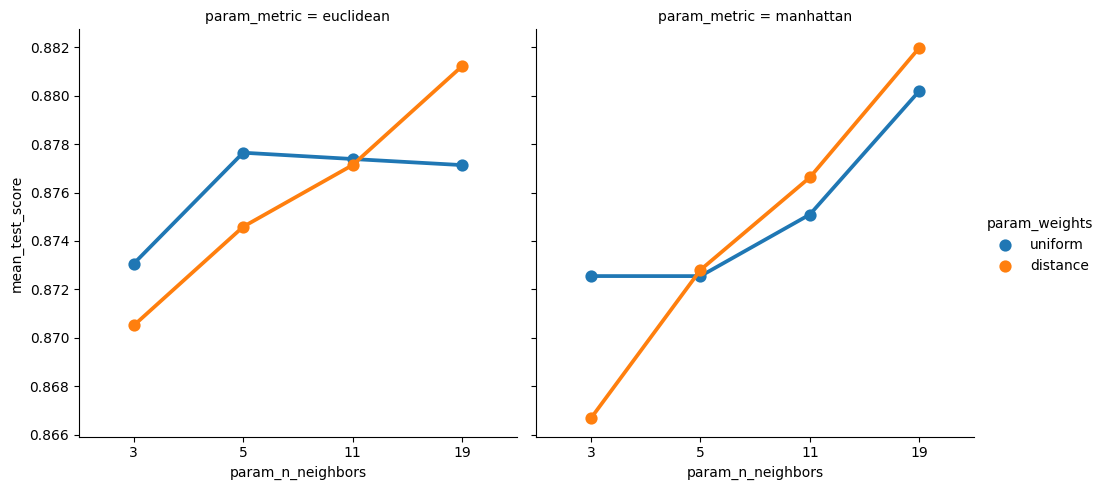

In [ ]:
sn.catplot(x="param_n_neighbors", y="mean_test_score", hue="param_weights", kind="point", col="param_metric",data=grid_results);


K vs accuracy

##Random forest

Al igual que el modelo anterior, defimos el modelo de clasificación, que en este caso es random forest. 

Los parametros a analizar para este modelo son los siguientes:


*   n_estimators: Cantidad de arboles a realizar. Para este caso lo dejamos fijo como 100.
*   max_features: Cantidad de variables que se deben considerar al buscar la mejor división.
*   max_depth: Profundidad maxima del arbol.
*   criterion: Función para medir la calidad de la división. Los dos criterios admitidos son la impureza de Gini (gini) y la entropia (entropy).

Se pueden encontrar más parametros para este modelo en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) del clasificador de random forest.

Luego realizamos la grilla con cross validation para obtener los mejores parametros y por ultimo graficamos los puntajes obtenidos en ella.

Es un metodo mas complejo pero estable. Es de lo que mejores funciona, pero es mas lento, por ende, mas caro.

A cada arbol le paso una cantidad diferente de filas y columnas al azar. Asi armo los diferentes arboles. 

Es una tecnica mas robusta, pues aca se arman muchos arboles, y al hacer eso evitamos el sobreajuste.

Best params for Random Forest:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2'}


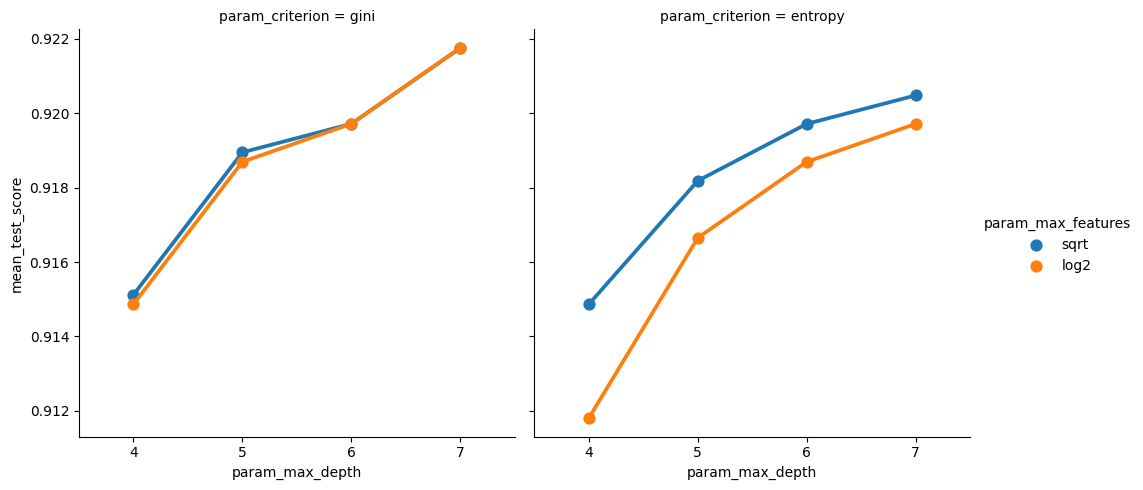

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

#Determinamos los parametros a probar en la grilla
parametros={  'max_features': ['sqrt', 'log2'], 'max_depth' : [4,5,6,7],'criterion' :['gini', 'entropy']}

#Realizamos la grilla
rf_cv=GridSearchCV(rf,parametros,cv=10)
rf_cv.fit(X_train_scaled, y_train_scaled)

#vemos los mejores parametros segun la grilla
print('Best params for Random Forest:')
print(rf_cv.best_params_)

#Guardamos el mejor modelo para luego obtener sus resultados de validacion
rf = rf_cv.best_estimator_

#transformamos los resultados de la grilla en un dataframe
grid_results = pd.DataFrame(rf_cv.cv_results_)

#graficamos los puntaje obtenidos segun cada parametro analizado
sn.catplot(x="param_max_depth", y="mean_test_score", hue="param_max_features", kind="point", col="param_criterion",data=grid_results);


In [ ]:
rf

RandomForestClassifier(max_depth=7)

##Red neuronal

Como en los modelos anteriores, definimos el modelo de clasificiación a utilizar que es redes neuronales. 

Luego definimos los parametros a probar en la grilla, en este caso se analizaran los siguientes:


*   batch_size: Tamaño de mini batches para optimizadores estocásticos (batch=muestra).
*   max_iter: Número maximo de iteraciones. Determina el número de epocas. 
*   alpha: Parametro de penalización (Termino de regularización).
*   hidden_layer_sizes: Número de neuronas en la capa oculta.


Se pueden encontrar más parametros para este modelo en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) del clasificador de redes neuronales.

La red neuronal es una funcion continua no lineal que la dimension de entrada es igual al numero de atributos y la de salida es igual al numero de clases.

La grilla es probar distintas combinaciones de parametros en distintas redes neuronales para ver cual es el que me entrega el mejor resultado, el menor error de clasificacion.

Por ultimo, hacemos la grilla con cross validation para obtener los mejores parametros de este modelo



En resumen los parametros son cantidad de capas ocultas, cantidad de neuronas de entrada y salida y de la capas ocultas, que definen los grados de libertad.

In [ ]:
red = MLPClassifier(solver='lbfgs' ) 

#Determinamos los parametros a probar en la grilla
parametros={"batch_size" : [5, 10, 20],'max_iter': [50,100], 'alpha': [0.1, 0.01, 0.001], 'hidden_layer_sizes':[(2,3),3,5]} #()cantidad de capas ocultas y neuronas

#Realizamos la grilla
red_cv=GridSearchCV(red,parametros,n_jobs=2,cv=10) #cross validation. los separa en 10 conjuntos, algunos de entrenamineto y otros de validacion
red_cv.fit(X_train_scaled, y_train_scaled)

#vemos los mejores parametros segun la grilla
print('Best params for neural network:')
print(red_cv.best_params_)

#Guardamos el mejor modelo para luego obtener sus resultados de validacion
red = red_cv.best_estimator_

Best params for neural network:
{'alpha': 0.001, 'batch_size': 5, 'hidden_layer_sizes': 3, 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Definimos la cantidad de capas ocultas y la cantidad de neuronas en las capas ocultas. Las capas ocultas hacen el preocesamiento no lineal de los atributos recibidos.

[(2,3),3,5]

()configuracion de 2 capas ocultas, con 2 neuronas en la primera y 3 en la segunda

despues 1 capa oculta de 3 neuronas
1 capa oculta con 5 neuronas

Recordar que prueba todas las combinaciones posibles entre todos los parametros, entonces cada configuracion resultante es una red neuronal distinta, que el modelo prueba, calcula su error y se quedara con la red que tenga el grupo de paramatros con menor error. Por ejemplo, comnbinacion batch = 5 ,iter = 50, alpha = 0.1.. despues natch = 5, iter = 50, alpha = 0.01.. y asi.

En linea 7, el cv=10 (Cross validation) quiere decir que toma toda la data de entrenamiento en 10 conjuntos. Cada uno de esos 10 conjuntos es el de validacion y el resto es entrenamiento, y el error final es el promedio de los errores. Al hacer varios grupos de entrenamiento evitamos el sobreajuste.

De ahi en la linea 12 se calculan el conjunto de parametros que obtienen los mejores resultados.

Nos da que el mejor ajuste es 1 sola capa oculta con 3 neuronas, con un alpha de 0.001

Los datos de entrada de una red son los atributos y los de salida son clases, por ejemplo, positiva y negativa.

Para graficar la red neuronal utilizamos un código de git, para esto ejecutamos los siguentes comandos:

In [ ]:
! git clone https://github.com/jzliu-100/visualize-neural-network.git

Cloning into 'visualize-neural-network'...
remote: Enumerating objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (61/61), 3.82 MiB | 11.91 MiB/s, done.


In [ ]:
! python /content/visualize-neural-network/VisualizeNN.py 
%cd /content/visualize-neural-network
!ls

/content/visualize-neural-network
ANN_20230504_210917.png  __pycache__  testVisualizeNN.py	VisualizeNN.py
img			 README.md    visualize-neural-network


In [ ]:
print(red.hidden_layer_sizes)

3


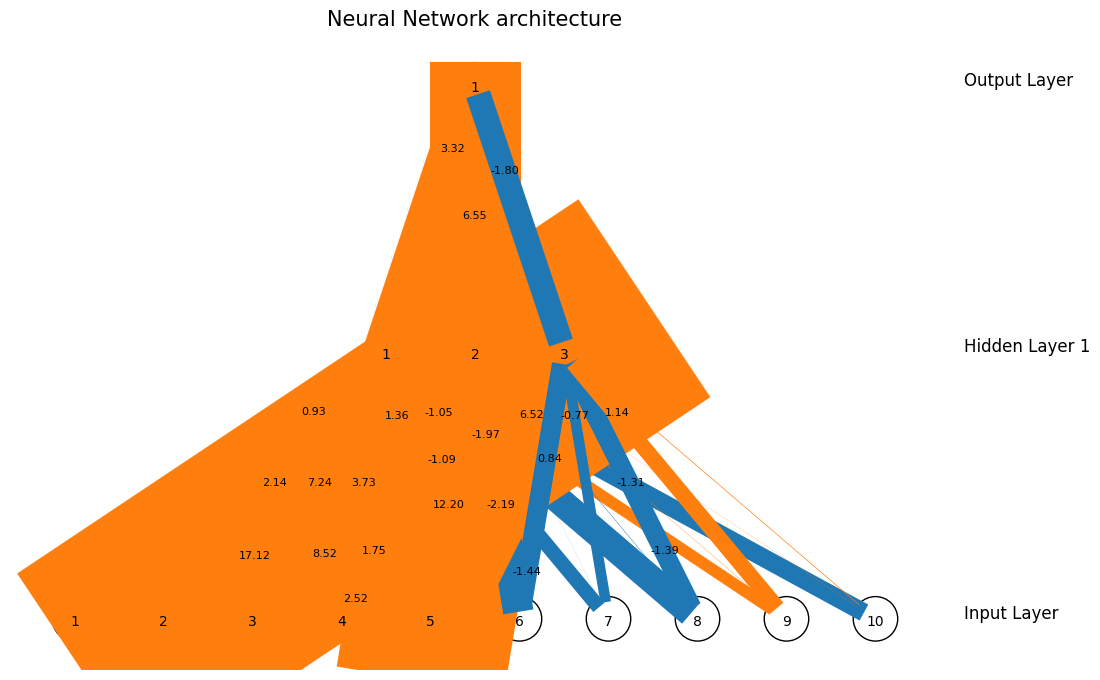

In [ ]:
#import VisualizeNN as VisNN
#hidden_layer_sizes = [int(i) for i in red.hidden_layer_sizes]
#network = VisNN.DrawNN([X_train_scaled.shape[1], red.hidden_layer_sizes, 1], red.coefs_)
#network.draw() Todo este código de la línea 1 a la 4 ya no funciona.

import VisualizeNN as VisNN

# Obtener la forma de entrada de la red neuronal
input_shape = X_train_scaled.shape[1]

# Obtener el número de neuronas en cada capa
hidden_layer_sizes = red.hidden_layer_sizes
output_layer_size = 1

# Convertir las neuronas de las capas ocultas en una lista de enteros simples
if isinstance(hidden_layer_sizes, int):
    hidden_layer_sizes = [hidden_layer_sizes]
else:
    hidden_layer_sizes = list(hidden_layer_sizes)

# Crear la lista de neuronas por capa y dibujar la red neuronal
try:
    neurons_per_layer = [input_shape] + hidden_layer_sizes + [output_layer_size]
    network = VisNN.DrawNN(neurons_per_layer, red.coefs_)
    network.draw()
except Exception as e:
    print("Ocurrió un error al dibujar la red neuronal:", e)


In [ ]:
X_train_scaled

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL
5339,0.200000,0.074074,0.036675,0.599397,0.062626,0.871192,0.0,1.0,1.0,0.0
2196,0.353846,0.000000,0.009780,0.594380,0.140921,0.867995,0.0,1.0,0.0,0.0
2901,0.353846,0.111111,0.019560,0.598641,0.130537,0.889636,0.0,1.0,0.0,1.0
4412,0.461538,0.222222,0.088020,0.598710,0.081133,0.901823,0.0,1.0,1.0,0.0
2140,0.215385,0.000000,0.039120,0.596648,0.075500,0.846975,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4931,0.430769,0.000000,0.000000,0.594517,0.061090,0.910189,0.0,0.0,0.0,0.0
3264,0.400000,0.111111,0.163814,0.611133,0.084085,0.896903,0.0,1.0,0.0,0.0
1653,0.476923,0.111111,0.000000,0.605508,0.061310,0.892707,0.0,0.0,1.0,0.0
2607,0.076923,0.111111,0.207824,0.594242,0.063501,0.847118,0.0,1.0,0.0,0.0


Grosor de cada linea son los pesos asociados, el color de la linea es la proporcionalidad, ver que hay pesos positivos y otros negativos. Vemos que gran parte del peso del resultado se esta dando al parecer desde las neuronas......

Al final, este modelo, selecciono la mejor funcion que relaciona las variables de entrada con la dependiente.

COn backpropagation hacemos que este modelo aprenda de los datos, sea machine learning. BUsca de forma euristica, no busca el optimo real sino que va iterando buscando la minimizacion del error de la red, comparando las diferencias entre los resultados obtenidos y los esperados. Ese error lo retroalimento, tomando el peso especifico que tuvo mas influencia en el error, y castigandolo en mayor proporcion para reducir el error. Esto se hace propagandolo hacia atras, recalculando de ahi los pesos de la red para caluclar la nueva salida, que tendra otro error que de nuevo hara backpropagation hasta encontrar el minimo error. 

Asi, las lineas que son mas gruesas, las que tienen mas peso seran "castigadas" por el backpropagation los pesos hacia atras, pues el error fue causado en mayor parte por la neuronas que tienen mayor peso.

Pasa que al iterar puede ser que llege a un error minimo local, tonces si sigo iterando puedo aumentar el error y despues bajarlo aun mas. Para evitar esto, se estudia un parametro llamado tasa de aprendizaje. 

Acerca del sobreajuste, si tengo cierto error en el conjunto de entrenamiento y el error se dispara en la validacion, existe un sobreajuste. El modelo quedo muy ajustado al conjunto de entrenamiento y no me esta entregando valores al azar. El entrenamiento no siempre es lineal, puede tener valores alto de error y despues puede bajar mucho.

Dependiendo de como vayamos haciendo las fases de entrenamiento, o de la cantidad de iteraciones que vayamos haciendo, estos valores podrian ir variando un poco, no siempre seran los mismos resultado, a veces muestra distinto numero en la capa oculta y distintos pesos.

## Support vector machine

Al igual que los modelos anteriores, defimos el modelo de clasificación, que en este caso es Suport Vector Machine.

ACa se busca separar las clases de la variable Objetivo, por ejemplo, clase Fuga y NoFUGA, con un hiperplano separador que intentamos construir. Asi cuando exista una nueva observacion, esta deberia pertenecer a la clase FUGA o NO FUGA, determinada por la funcion de decision.

Tambien podemos trazar vectores soportantes, una recta que pasa por la observacion mas cercana a nuestro hiperplano separador. Puedo tener infitos planos con esas caracteristicas.

Definimos los parametros a probar en la grilla, se analizaran los siguientes:

*   C: Parametro de regularización. La fuerza de la regularizacioón es inversamente proporcional a C. Es el costo de la funcion objetivo a minimizar.

*   gamma: Coeficiente del kernel. 

Se pueden encontrar más parametros para este modelo en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) del clasificador de support vector machine.

Lo que hacemos con SVM es miminizar el riesgo estructural,  no el empirico, pues en este ultimo siempre existira alguna funcion que acierta el conjunto de muestra y falle en todos los demas, asi llega al sobreajuste.

Luego realizamos la grilla con cross validation para obtener los mejores parametros y por ultimo graficamos los puntajes obtenidos en ella.

Un parametro es la funcion Kernel, que transforma el espacio, para darle un caracter no lineal al problema, de manera que se pueda trabajar con una linea recta separando las clases cuando inicialmente no se podia en este nuevo espacio, y volver al espacio inicial, mediante una fc inversa, con un hyperplano separado que no parece recta. En resumen tratar algo lineal como algo no lineal

Vemos que definimos la grilla aplicandole tres valores al parametro C y tres al parametro gamma, se aplica la grilla y arma todos los modelos asociados a cada combinacion de la grilla. Un modelo por combinacion.

Y con el Cross validation (CV) me indica el conjunto de parametros que tendra el menor error de clasificacion.

Best params for SVM:
{'C': 100000.0, 'gamma': 0.0001}


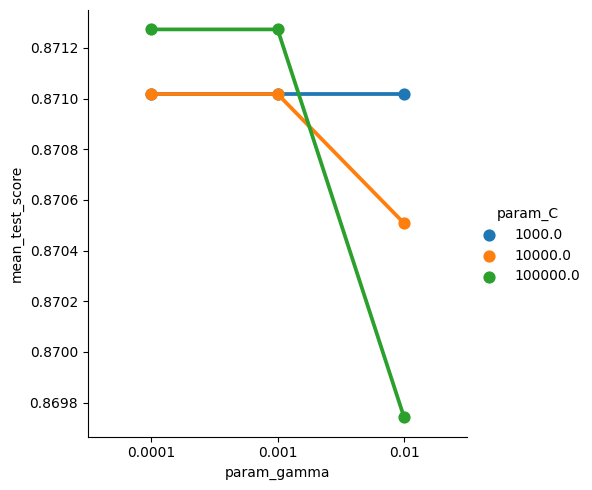

In [ ]:
svm = SVC(probability=True)

#Aplicamos grid search para los parametros
parametros={'C': [1e3, 1e4, 1e5],'gamma': [0.0001, 0.001, 0.01]}
svm_cv=GridSearchCV(svm,parametros,cv=10)
svm_cv.fit(X_train_scaled, y_train_scaled)

#para ver los parametros del mejor modelo
print('Best params for SVM:')
print(svm_cv.best_params_)

#Guardamos el mejor modelo para luego obtener sus reusltados de validacion
svm = svm_cv.best_estimator_

#transformamos los reusltados de la grilla en un dataframe
grid_results = pd.DataFrame(svm_cv.cv_results_)

#graficamos los puntaje obtenidos segun cada parametro analizado
sn.catplot(x="param_gamma", y="mean_test_score", hue="param_C", kind="point",data=grid_results);


In [ ]:
svm

SVC(C=100000.0, gamma=0.0001, probability=True)

# Evaluación


Evaluamos el rendimiento de los modelos previamente entrenados para determinar su capacidad de predicción de la variable objetivo, para esto utilizamos los datos de prueba.

El indice AUC es el area bajo la curva ROC. Mientras mas grande la curva AUC, mejor es el modelo.

Creamos un data frame vacio para guardar los resultados de predicción de cada modelo y luego graficarlos

In [ ]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

## Regresión logistica

Calculamos el accuracy del modelo con los datos de prueba

In [ ]:
Ac_reg = regresion.score(X_test_reg, y_test)
print('Accuracy of Regresion: {:.2f}'.format(Ac_reg))

Accuracy of Regresion: 0.88


la cantidad de veces que le acerto fue de un 88%. El 88% de los casos fue acertado de forma correcta. Pero, es posible que pase esto cuando tengo una variable que no tiene sentido como el ingreso?

Obtenemos la predicción de los valores de la variable y a partir de los datos de prueba de la variable x

In [ ]:
Y_pred_regresion = regresion.predict(X_test_reg)

Calculamos la matriz de confusión del modelo

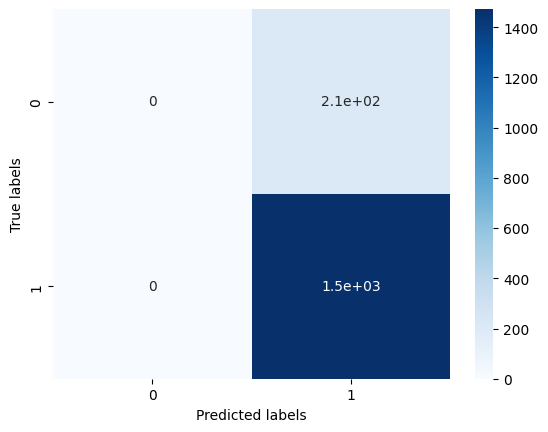

In [ ]:
#metrics.plot_confusion_matrix(regresion, X_test_reg, y_test, values_format='.6g', cmap='Blues') obsoleto
cm = confusion_matrix(y_test, Y_pred_regresion)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

cuantas veces le acerte. Vemos que un lado de la matriz esta en 0. Esto puede pasar en el 70% que arregle. Como estan ordenados los datos para que ocurra esto? aqui por ejemplo quizas se tomaron todos los que no se fugaron y no pudo predecir los que se fugaron, a pesar de las iteraciones.

Lo Datos estan muy desbalanceados, por lo que es necesario balancearla si quisieramos obtener los resultados de deste modelo.

Obtenemos el reporte de clasificación entre la variable objetivo de prueba y la variable objetivo de predicción

In [ ]:
#Reporte = classification_report(y_test, Y_pred_regresion)
Reporte = classification_report(y_test, Y_pred_regresion, zero_division = 1)
print('Reporte de clasificacion: ')
print(Reporte)

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       210
           1       0.88      1.00      0.93      1472

    accuracy                           0.88      1682
   macro avg       0.94      0.50      0.47      1682
weighted avg       0.89      0.88      0.82      1682



se observa que tuvo una precision de los clientes que no se fugan de un 88% pero de los que se fugan, 1??.

Calculamos el area bajo la curva ROC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, regresion.predict_proba(X_test_reg)[:,1])
auc = roc_auc_score(y_test, Y_pred_regresion)
print('AUC: %.3f' % auc)

AUC: 0.500


Agregamos los resultados obtenidos para luego graficar la curvas ROC del modelo

In [ ]:
result_table = result_table.append({'classifiers': 'Regresion logistica','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
#result_table = pd.concat([result_table, pd.DataFrame({'classifiers': ['Regresion logistica'], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]})], ignore_index=True)

<ipython-input-213-f0e2b470647b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'Regresion logistica','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)


In [ ]:
result_table

,classifiers,fpr,tpr,auc
0,Regresion logistica,"[0.0, 0.0, 0.0, 0.004761904761904762, 0.004761...","[0.0, 0.0006793478260869565, 0.012228260869565...",0.5


**Realizamos el mismo procedimiento con todos los modelos como se muestra a continuación:**

## Arbol de decisión

Accuracy of Decision trees: 0.92


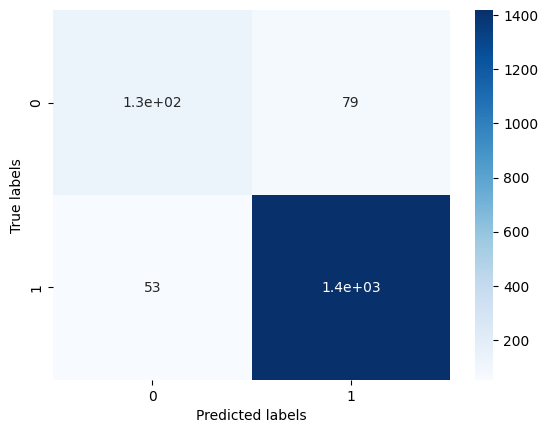

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       210
           1       0.95      0.96      0.96      1472

    accuracy                           0.92      1682
   macro avg       0.83      0.79      0.81      1682
weighted avg       0.92      0.92      0.92      1682

AUC: 0.794


<ipython-input-215-cc3fe35fc853>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'Arbol de decisión','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)


In [ ]:
# Accuracy
Ac_tree = arbol.score(X_test, y_test) #con el modelo entrenado en entrenamiento (arbol)
print('Accuracy of Decision trees: {:.2f}'.format(Ac_tree))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_tree = arbol.predict(X_test)

#matriz de confusion
#metrics.plot_confusion_matrix(arbol, X_test, y_test, values_format='.6g', cmap='Blues') 
cm = confusion_matrix(y_test, Y_pred_tree)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test, Y_pred_tree)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test, arbol.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, Y_pred_tree)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'Arbol de decisión','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
#result_table = pd.concat([result_table, pd.DataFrame({'classifiers': ['Arbol de decisión'], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]})], ignore_index=True)

Error tipo 1. predigo algo false de forma positiva. Ej: A un hombre se le dice :'Estas embarazado'. Esta afirmacion es negativa, pero la prediccion es falsa por que es un hombre y no una mujer

Error tipo 2. predigo algo falso de forma negativa. A una mujer que esta embarazada le digo que 'no esta emabarazada'. la afirmacion es negativa y la prediccion es falsa.

La matriz de confusión evalua el desempeño real, a partir de la prediccion y la realidad. Pueden ocurrir cuatro casos: 

tp: true positive, predigo que sí se fuga correctactamente. Clase positiva

tn: True negative, predigo que no se fuga correctamente. Clase negativa.

fp:False positive, predigo que sí se fuga incorrectamente.

fn: False negative, Predigo que no se fugan incorrectamente.



In [ ]:
Y_pred_tree

array([1, 0, 1, ..., 1, 1, 1])

## K-vecinos mas cercanos

Accuracy of k-vecinos mas cercanos: 0.89


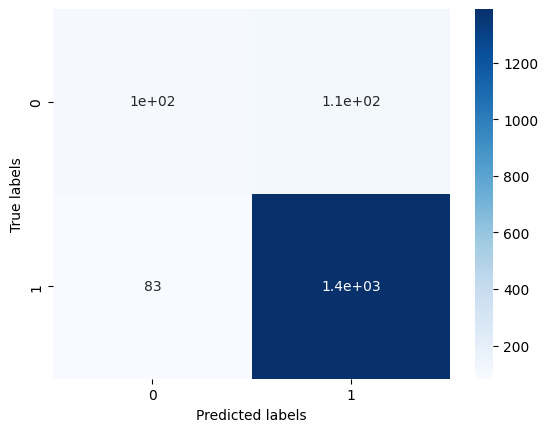

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       210
           1       0.93      0.94      0.94      1472

    accuracy                           0.89      1682
   macro avg       0.74      0.71      0.72      1682
weighted avg       0.88      0.89      0.88      1682

AUC: 0.710


<ipython-input-217-dceb1907eb20>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'K-vecinos mas cercanos','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)


In [ ]:
# Accuracy
Ac_knn = Knn.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of k-vecinos mas cercanos: {:.2f}'.format(Ac_knn))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_knn = Knn.predict(X_test_scaled)

#matriz de confusion
#metrics.plot_confusion_matrix(Knn, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues') 
cm = confusion_matrix(y_test, Y_pred_knn)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test_scaled, Y_pred_knn)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, Knn.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test_scaled, Y_pred_knn)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'K-vecinos mas cercanos','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
#result_table = pd.concat([result_table, pd.DataFrame({'classifiers': ['K-vecinos mas cercanos'], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]})], ignore_index=True)

## Random Forest

Accuracy of random forest: 0.92


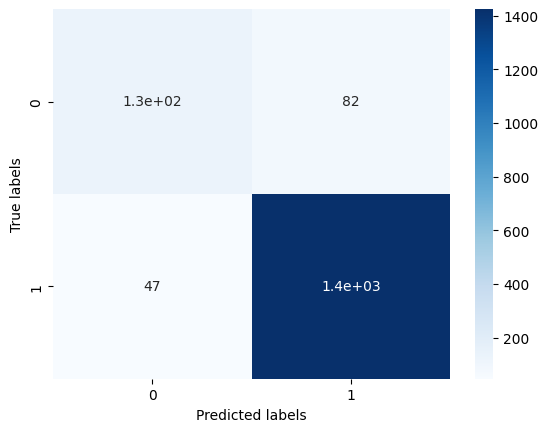

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       210
           1       0.95      0.97      0.96      1472

    accuracy                           0.92      1682
   macro avg       0.84      0.79      0.81      1682
weighted avg       0.92      0.92      0.92      1682

AUC: 0.789


<ipython-input-225-a6cf92ccf5e2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'Random forest','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)


In [225]:
# Accuracy
Ac_rf = rf.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of random forest: {:.2f}'.format(Ac_rf))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_rf = rf.predict(X_test_scaled)

#matriz de confusion
#metrics.plot_confusion_matrix(rf, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues')
cm = confusion_matrix(y_test, Y_pred_rf)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show() 

#Reporte de clasificacion
Reporte = classification_report(y_test_scaled, Y_pred_rf)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, rf.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test_scaled, Y_pred_rf)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'Random forest','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
#result_table = pd.concat([result_table, pd.DataFrame({'classifiers': ['Random forest'], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]})], ignore_index=True)

## Red Neuronal

Accuracy of red neuronal: 0.90


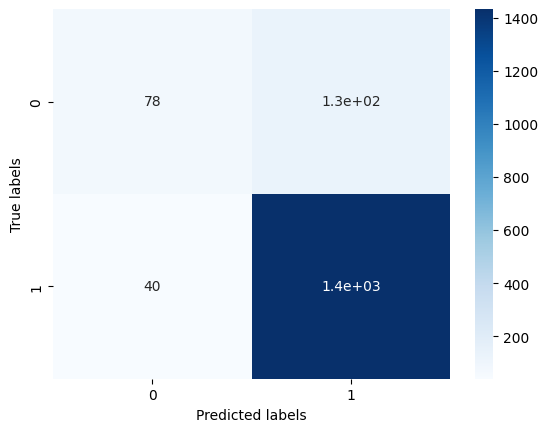

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       0.66      0.37      0.48       210
           1       0.92      0.97      0.94      1472

    accuracy                           0.90      1682
   macro avg       0.79      0.67      0.71      1682
weighted avg       0.88      0.90      0.88      1682

AUC: 0.672


<ipython-input-219-504c48b02712>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'Red neuronal','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)


In [ ]:
# Accuracy
Ac_red = red.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of red neuronal: {:.2f}'.format(Ac_red))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_red = red.predict(X_test_scaled)

#matriz de confusion
#metrics.plot_confusion_matrix(red, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues')
cm = confusion_matrix(y_test, Y_pred_red)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test_scaled, Y_pred_red)
print('Reporte de clasificacion: ')
print(Reporte)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, red.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test_scaled, Y_pred_red)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de reusltados
result_table = result_table.append({'classifiers': 'Red neuronal','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
#result_table = pd.concat([result_table, pd.DataFrame({'classifiers': ['Red neuronal'], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]})], ignore_index=True)

## Support vector machine

Accuracy of SVM: 0.88


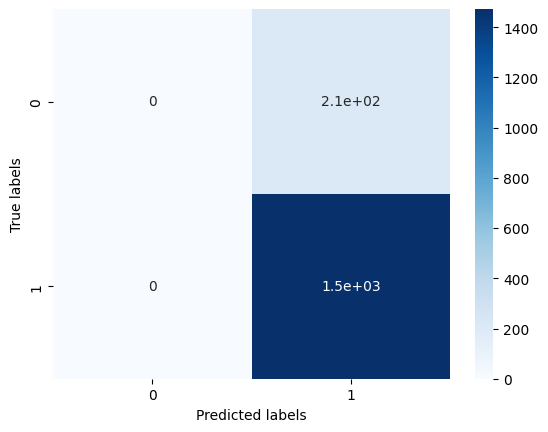

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       210
           1       0.88      1.00      0.93      1472

    accuracy                           0.88      1682
   macro avg       0.94      0.50      0.47      1682
weighted avg       0.89      0.88      0.82      1682

AUC: 0.500


<ipython-input-220-8c0501310f23>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': 'Suport vector machine','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)


In [ ]:
# Accuracy
Ac_svm = svm.score(X_test_scaled, y_test_scaled) #con el modelo entrenado en entrenamiento
print('Accuracy of SVM: {:.2f}'.format(Ac_svm))

#obtenemos el valor de la variable objetivo a partir de los datos de la variable independiente de prueba
Y_pred_svm = svm.predict(X_test_scaled)

#matriz de confusion
#metrics.plot_confusion_matrix(svm, X_test_scaled, y_test_scaled, values_format='.6g', cmap='Blues') 
cm = confusion_matrix(y_test, Y_pred_svm)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()  

#Reporte de clasificacion
Reporte = classification_report(y_test, Y_pred_svm, zero_division = 1)
print('Reporte de clasificacion: ')
print(Reporte)
#Reporte = classification_report(y_test_scaled, Y_pred_svm)

# Calculo de AUC
fpr, tpr, thresholds = roc_curve(y_test_scaled, svm.decision_function(X_test_scaled))
auc = roc_auc_score(y_test_scaled, Y_pred_svm)
print('AUC: %.3f' % auc)

#Para agregar a la tabla de resultados
result_table = result_table.append({'classifiers': 'Suport vector machine','fpr':fpr,'tpr':tpr, 'auc':auc}, ignore_index=True)
#result_table = pd.concat([result_table, pd.DataFrame({'classifiers': ['Red neuronal'], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]})], ignore_index=True)

## Curvas ROC 


In [ ]:
print(result_table.columns)
result_table.set_index('classifiers', inplace=True)

Index(['classifiers', 'fpr', 'tpr', 'auc'], dtype='object')


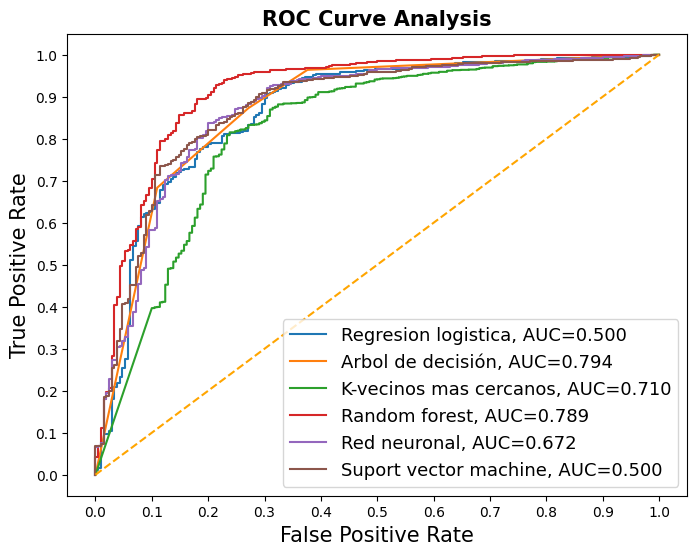

In [ ]:
#result_table = result_table.reset_index(drop= True) # Esto crea un nuevo índice numérico para tu tabla
# plot ROC curves
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Graficamos las curvas ROC de todos los modelos 

Mientras mas cerca se encuentre la curva de la linea punteada, mas aleatorio es y por ende sera un peor modelo.

Como podemos ver en nuestros resultados de evaluación, el mejor modelo es el de Arbol de decisin con un AUC de 0.794. El modelo debe tener un AUC mayor a 0.7

Guardamos este modelo entrenado en un archivo para luego realizar predicciones con el.

Dependiendo de como vayamos haciendo las fases de entrenamiento, o de la cantidad de iteraciones que vayamos haciendo, estos valores podrian ir variando un poco, no siempre seran los mismos resultado.

In [ ]:
# crea un dataframe con los valores de AUC y los nombres de cada curva
auc_values = pd.DataFrame({'AUC': result_table['auc'].values}, index=result_table.index)
auc_values = auc_values[['AUC']]

# muestra el dataframe
print(auc_values)

                             AUC
classifiers                     
Regresion logistica     0.500000
Arbol de decisión       0.793902
K-vecinos mas cercanos  0.709902
Random forest           0.788797
Red neuronal            0.672127
Suport vector machine   0.500000


In [ ]:
%cd /content
drive.mount('/content/gdrive')
dump(regresion, 'gdrive/My Drive/modelo_entrenado.joblib')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['gdrive/My Drive/modelo_entrenado.joblib']